<a href="https://colab.research.google.com/github/namans-git/res-paper-du/blob/main/dtree_rforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#uploading file from pc
from google.colab import files
uploaded = files.upload()

Saving Front.xlsx to Front.xlsx


In [26]:
df = pd.read_excel("Front.xlsx")

In [29]:
df.head()

,S.No.,Student,Attempt Submission Time,Grades,Exam duration (Sec)
0,1,MUHAMMED FAIES,"Dec. 29, 2021, 11:16 a.m.",93.33,390
1,2,Sai Akshay,"Dec. 29, 2021, 9:09 a.m.",80.00,726
2,3,MUHAMMED NA,"Dec. 29, 2021, 4:55 a.m.",80.00,666
3,4,VINAYAK K,"Dec. 29, 2021, 4:03 a.m.",46.67,478
4,5,ANJALI ARORA,"Dec. 28, 2021, 5:09 p.m.",80.00,946


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.No.                    45 non-null     int64  
 1   Student                  45 non-null     object 
 2   Attempt Submission Time  45 non-null     object 
 3   Grades                   45 non-null     float64
 4   Exam duration (Sec)      45 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ KB


In [6]:
#converting the submission time strings to datetime and then to epoch
df['Attempt Submission Time'] = pd.to_datetime(df['Attempt Submission Time'])
df['Attempt Submission Time']= df['Attempt Submission Time'].apply(lambda x: x.value)

In [7]:
#scaling numerical variables
scaler = MinMaxScaler()
df['std_scaled_grades'] = scaler.fit_transform(df['Grades'].values.reshape(-1,1))
df['std_scaled_duration'] = scaler.fit_transform(df['Exam duration (Sec)'].values.reshape(-1,1))
df['std_scaled_submTime'] = scaler.fit_transform(df['Attempt Submission Time'].values.reshape(-1,1))

In [ ]:
#assigning every student the default behaviour i.e. 0
df['behaviour'] = 0

#to certain already flagged students, we assign 1
lst = [16, 18, 22, 24, 30, 34, 35, 36, 37, 38]
for k in lst:
  df['behaviour'][k] = 1

In [ ]:
#changing the binary values to str
df.behaviour[df.behaviour == 0] = 'normal'
df.behaviour[df.behaviour == 1] = 'suspect'

In [10]:
df.head(2)#

,S.No.,Student,Attempt Submission Time,Grades,Exam duration (Sec),std_scaled_grades,std_scaled_duration,std_scaled_submTime,behaviour
0,1,MUHAMMED FAIES,1640776560000000000,93.33,390,0.874930,0.206970,1.000000,normal
1,2,Sai Akshay,1640768940000000000,80.00,726,0.624977,0.445946,0.923309,normal


In [11]:
#creating a seperate df consisting of all  the scaled numerics
data = [df['behaviour'],df['std_scaled_duration'], df['std_scaled_grades'], df['std_scaled_submTime']]
headers = ['behaviour','std_scaled_duration', 'std_scaled_grades', 'std_scaled_submTime']

new_df = pd.concat(data, axis=1, keys=headers)

In [12]:
new_df.head(2)

,behaviour,std_scaled_duration,std_scaled_grades,std_scaled_submTime
0,normal,0.206970,0.874930,1.000000
1,normal,0.445946,0.624977,0.923309


#### pairplots

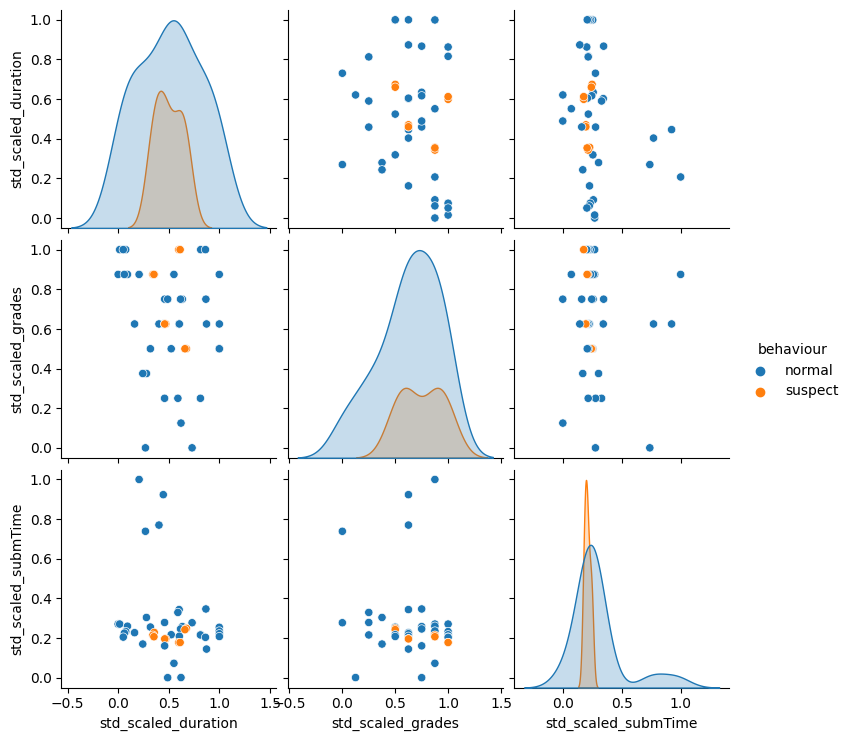

In [13]:
sns.pairplot(new_df, hue='behaviour')

#### Understanding the pairplots.
#### > pairplots with the same variables show the numerical distribution.

##### for e.g. looking at scaled duration, since it resembles a normal distribution we imply that most of the students took time around the mean/median which is to be expected

##### similar with grades, they're skimming slightly to the right which shows that students have mostly scored well

#### we see that for 'suspect' students the submission times (the exact time when they submitted) are very close together, which is abnormal.

#### trying a decision tree and a random forest model on the data

In [15]:
from sklearn.model_selection import train_test_split

X = new_df.drop('behaviour', axis=1)
y = df['behaviour']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
predictions = dtree.predict(X_test) # predictions for y_test

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[10  3]
 [ 0  1]]


              precision    recall  f1-score   support

      normal       1.00      0.77      0.87        13
     suspect       0.25      1.00      0.40         1

    accuracy                           0.79        14
   macro avg       0.62      0.88      0.63        14
weighted avg       0.95      0.79      0.84        14



#### Random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[11  2]
 [ 0  1]]


              precision    recall  f1-score   support

      normal       1.00      0.85      0.92        13
     suspect       0.33      1.00      0.50         1

    accuracy                           0.86        14
   macro avg       0.67      0.92      0.71        14
weighted avg       0.95      0.86      0.89        14



It can be hard to conclude which measure performed better since it depends on the metric you value, if its precision, recall or f1-score but almost always when you have a larger dataset, random forests will perform better.